In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

In [3]:
r1 = 0.1
r2 = 0.2
def r_1(x):
    return r1*x
def r_2(x):
    return r2*x
def int_r_1(x):
    """
        integral of r_1
    """
    return r1/2*x**2
def int_r_2(x):
    """
        integral of r_2
    """
    return r2/2*x**2

#### Modelisation of $A_t^i=\sum_{n=1}^{N_t^i}U_n^i$

In [7]:
# N_t^i is a Possion process with parameter lambda_i
lambda_1 = 1
lambda_2 = 2

class combination_exponential():
    """
        Combination of two exponential random variables which models the strong and weak rainfalls, the distribution is given by:
        nu(u) = b*delta_1*exp(-delta_1*u)1_{u>0} + (1-b)*delta_2*exp(-delta_2*u)1_{u>0}
    """
    def __init__(self, b, delta_1, delta_2):
        assert b > 0 and b < 1
        assert delta_1 > 0
        assert delta_2 > 0
        self.b = b
        self.delta_1 = delta_1
        self.delta_2 = delta_2

    def pdf(self, u):
        """
            Probability density function of the combination of two exponential random variables
        """
        assert u >= 0
        return self.b*self.delta_1*np.exp(-self.delta_1*u) + (1-self.b)*self.delta_2*np.exp(-self.delta_2*u)

    def cdf(self, u):
        """
            Cumulative distribution function of the combination of two exponential random variables
        """
        assert u >= 0
        return self.b*(1-np.exp(-self.delta_1*u)) + (1-self.b)*(1-np.exp(-self.delta_2*u))
    
    def rvs(self, size):
        """
            Random variates of the combination of two exponential random variables
        """
        X = np.random.rand(size)
        return np.random.exponential(1/self.delta_1, size=size) * (X < self.b) + np.random.exponential(1/self.delta_2, size=size) * (X >= self.b)

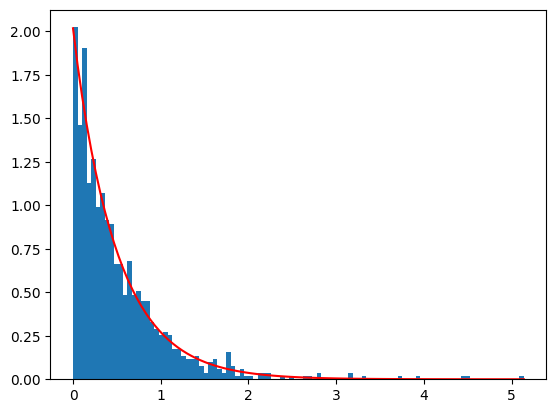

In [8]:
ce = combination_exponential(0.999, 2, 20)
X = ce.rvs(1000)
plt.hist(X, bins=100, density=True)
plt.plot(np.linspace(0, np.max(X), 100), [ce.pdf(x) for x in np.linspace(0, np.max(X), 100)], 'r')
plt.show()